In [50]:
import requests
import pandas as pd

url = (
    "http://oqmd.org/oqmdapi/formationenergy?"
    "limit=1000&offset=0&"
    "fields=entry_id,name,spacegroup,ntypes,band_gap,delta_e&"
    "filter=element_set=(O)"
)

response = requests.get(url).json()
df = pd.DataFrame(response["data"])

df.to_csv("oqmd_metal_oxides_stability_1000.csv", index=False)

print(df.head())
print(df.shape)


  name  entry_id spacegroup  ntypes  band_gap   delta_e
0  ZnO     20684      Pm-3m       2     0.000 -0.932217
1  CuO     11469      Fm-3m       2     0.000 -0.673436
2  TiO     17898      Fm-3m       2     0.000 -2.522310
3   VO      5578      Fm-3m       2     1.191 -2.259973
4  BeO     20737      F-43m       2     7.021 -2.960379
(1000, 6)


In [51]:
from pymatgen.core import Composition
df_comp = df.copy()
df_comp['composition'] = df_comp['name'].apply(lambda x: Composition(x))
df_comp.head()

,name,entry_id,spacegroup,ntypes,band_gap,delta_e,composition
0,ZnO,20684,Pm-3m,2,0.000,-0.932217,"(Zn, O)"
1,CuO,11469,Fm-3m,2,0.000,-0.673436,"(Cu, O)"
2,TiO,17898,Fm-3m,2,0.000,-2.522310,"(Ti, O)"
3,VO,5578,Fm-3m,2,1.191,-2.259973,"(V, O)"
4,BeO,20737,F-43m,2,7.021,-2.960379,"(Be, O)"


In [52]:
from matminer.featurizers.composition.composite import ElementProperty

el_prop_featuriser = ElementProperty.from_preset(preset_name='magpie', impute_nan=False)
el_prop_featuriser.set_n_jobs(1)
df_featurized = el_prop_featuriser.featurize_dataframe(df_comp, col_id='composition')

print(df_featurized.shape)  
print(df_featurized.isnull().sum().sum()) 
df_featurized.head()

c:\Users\51648\Documents\GitHub\ML4MSD-HW-YueZ\.venv\Lib\site-packages\matminer\utils\data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


ElementProperty:   0%|          | 0/1000 [00:00<?, ?it/s]

(1000, 139)
0


,name,entry_id,spacegroup,ntypes,band_gap,delta_e,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,ZnO,20684,Pm-3m,2,0.000,-0.932217,"(Zn, O)",8.0,30.0,22.0,...,0.000000,0.000000,0.000000,0.0,12.0,194.0,182.0,103.0,91.0,12.0
1,CuO,11469,Fm-3m,2,0.000,-0.673436,"(Cu, O)",8.0,29.0,21.0,...,0.000000,0.000000,0.000000,0.0,12.0,225.0,213.0,118.5,106.5,12.0
2,TiO,17898,Fm-3m,2,0.000,-2.522310,"(Ti, O)",8.0,22.0,14.0,...,0.000023,0.000011,0.000011,0.0,12.0,194.0,182.0,103.0,91.0,12.0
3,VO,5578,Fm-3m,2,1.191,-2.259973,"(V, O)",8.0,23.0,15.0,...,0.000000,0.000000,0.000000,0.0,12.0,229.0,217.0,120.5,108.5,12.0
4,BeO,20737,F-43m,2,7.021,-2.960379,"(Be, O)",4.0,8.0,4.0,...,0.000000,0.000000,0.000000,0.0,12.0,194.0,182.0,103.0,91.0,12.0


Number of features before cleaning: 134
Columns with very small variance: ['MagpieData maximum NsValence', 'MagpieData minimum NdValence', 'MagpieData minimum NfValence', 'MagpieData minimum NsUnfilled', 'MagpieData minimum NdUnfilled', 'MagpieData minimum NfUnfilled', 'MagpieData minimum GSbandgap', 'MagpieData minimum GSmagmom', 'MagpieData mode GSmagmom']
Number of features after removing small variance columns: 125
Columns to drop due to high correlation: {'MagpieData mean AtomicWeight', 'MagpieData range NsValence', 'MagpieData minimum MendeleevNumber', 'MagpieData range AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData range GSbandgap', 'MagpieData mode Number', 'MagpieData minimum Column', 'MagpieData maximum Column', 'MagpieData maximum NpValence', 'MagpieData minimum AtomicWeight', 'MagpieData maximum MeltingT', 'MagpieData avg_dev Number', 'MagpieData range NfValence', 'MagpieData maximum SpaceGroupNumber', 'MagpieData minimum MeltingT', 'MagpieData maximum NdValence

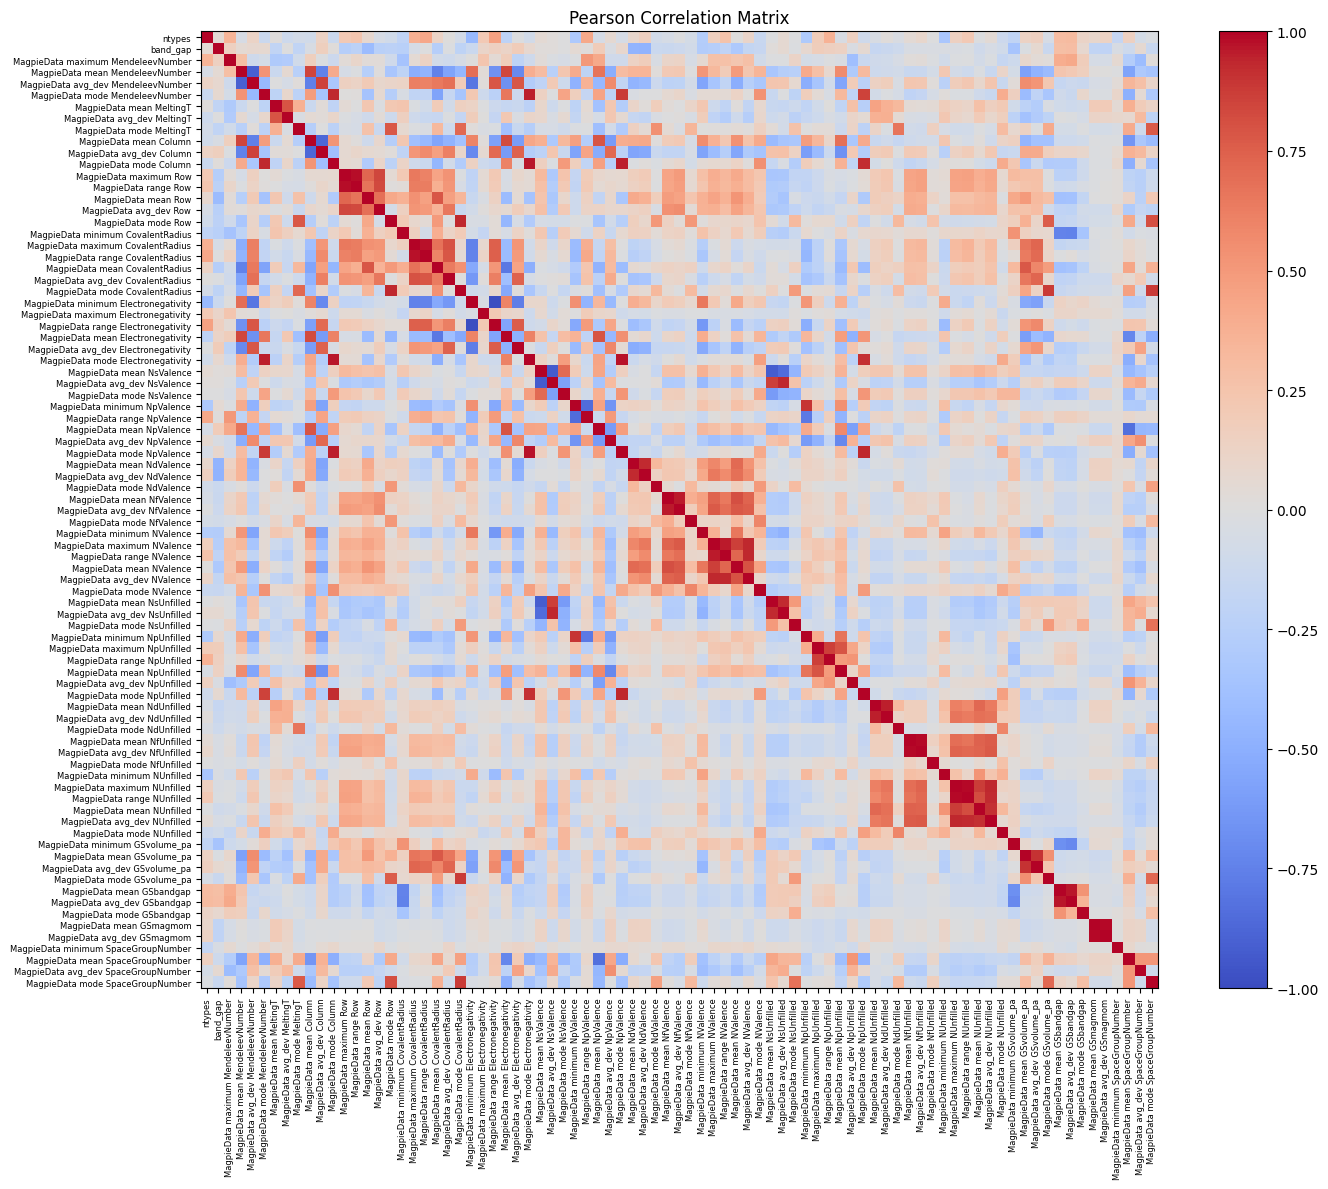

In [53]:
import matplotlib.pyplot as plt
y = df_featurized['delta_e']  
X_all = df_featurized.drop(columns=['delta_e', 'spacegroup', 'composition', 'name', 'entry_id'])  

print("Number of features before cleaning:", X_all.shape[1])

small_var_cols = X_all.columns[X_all.var() < 1e-5].tolist()
print("Columns with very small variance:", small_var_cols)
X_all = X_all.drop(columns=small_var_cols)
corr_matrix = X_all.corr(method='pearson')
print("Number of features after removing small variance columns:", X_all.shape[1])

threshold = 0.99
to_drop = set()
for col in corr_matrix.columns:
    high_corr = corr_matrix.index[(corr_matrix[col].abs() > threshold) & (corr_matrix.index != col)]
    to_drop.update(high_corr)
print("Columns to drop due to high correlation:", to_drop)
X = X_all.drop(columns=list(to_drop))
print("Number of features after removing highly correlated columns:", X.shape[1])

corr_matrix = X.corr(method='pearson')

plt.figure(figsize=(16, 12))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Pearson Correlation Matrix')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=6)
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

test_fraction = 0.1
validation_fraction = 0.2
X_trainval, X_test, y_trainval, y_test = train_test_split(X_scaled, y, 
                                                          test_size=test_fraction, 
                                                          random_state=17)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                  test_size=validation_fraction/(1-test_fraction), 
                                                  random_state=17)
print(f"Training fraction: {X_train.shape[0] / X_scaled.shape[0]:.2f}")
print(f"Validation fraction: {X_val.shape[0] / X_scaled.shape[0]:.2f}")
print(f"Test fraction: {X_test.shape[0] / X_scaled.shape[0]:.2f}")


Training fraction: 0.70
Validation fraction: 0.20
Test fraction: 0.10


In [55]:
from sklearn.metrics import mean_absolute_error

mean_train = y_train.mean()
baseline_mae = mean_absolute_error(y_val, [mean_train] * len(y_val))

print(f"Baseline MAE (predicting mean delta_e): {baseline_mae:.4f} eV")

Baseline MAE (predicting mean delta_e): 0.7620 eV


Training RF models:   0%|          | 0/4 [00:00<?, ?it/s]

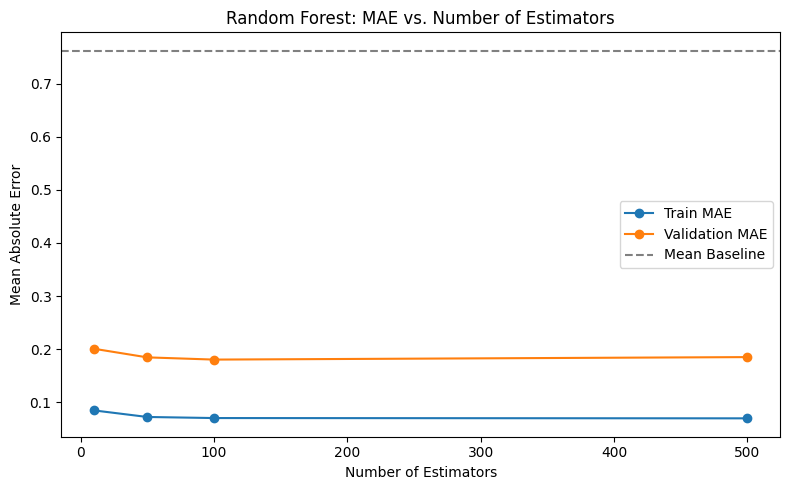

In [56]:
from sklearn.ensemble import RandomForestRegressor
from tqdm.notebook import tqdm

n_estimators_list = [10, 50, 100, 500]
train_maes = []
val_maes = []

for n in tqdm(n_estimators_list, desc='Training RF models'):
    rf = RandomForestRegressor(n_estimators=n, random_state=17, n_jobs=1)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_val_pred = rf.predict(X_val)
    train_maes.append(mean_absolute_error(y_train, y_train_pred))
    val_maes.append(mean_absolute_error(y_val, y_val_pred))

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, train_maes, marker='o', label='Train MAE')
plt.plot(n_estimators_list, val_maes, marker='o', label='Validation MAE')
plt.axhline(baseline_mae, color='gray', linestyle='--', label='Mean Baseline')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest: MAE vs. Number of Estimators')
plt.legend()
plt.tight_layout()
plt.savefig("composition_rf_n_estimators_mae.png", dpi=300, bbox_inches='tight')
plt.show()

RFE Progress:   0%|          | 0/16 [00:00<?, ?it/s]

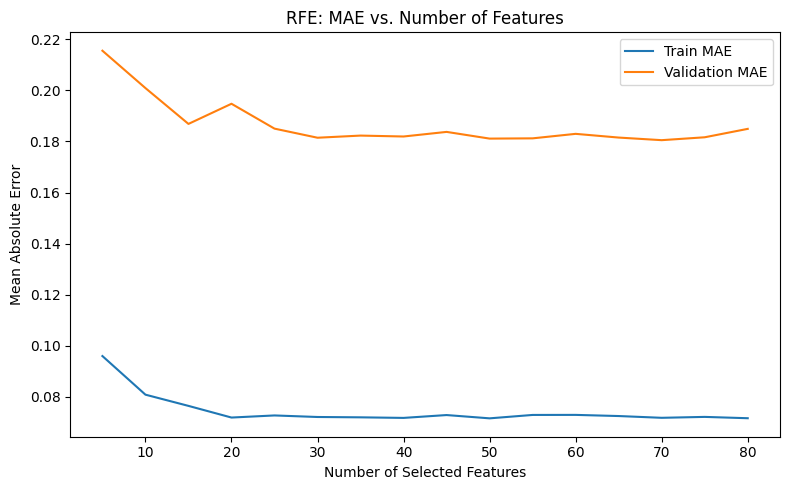

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from tqdm.notebook import tqdm

rf = RandomForestRegressor(n_estimators=50, random_state=17, n_jobs=1)
n_features_list = list(range(5, X_val.shape[1]+1, 5))
val_errors = []
train_errors = []
selected_features_dict = {}

for n_features in tqdm(n_features_list, desc='RFE Progress'):
    rfe = RFE(estimator=rf, n_features_to_select=n_features, step=5)
    rfe.fit(X_train, y_train)
    selected_features_dict[n_features] = list(X.columns[rfe.support_])
    X_train_rfe = rfe.transform(X_train)
    rf.fit(X_train_rfe, y_train)
    y_train_pred = rf.predict(X_train_rfe)
    train_errors.append(mean_absolute_error(y_train, y_train_pred))
    X_val_rfe = rfe.transform(X_val)
    y_val_pred = rf.predict(X_val_rfe)
    val_errors.append(mean_absolute_error(y_val, y_val_pred))

plt.figure(figsize=(8, 5))
plt.plot(n_features_list, train_errors, label='Train MAE')
plt.plot(n_features_list, val_errors, label='Validation MAE')
plt.xlabel('Number of Selected Features')
plt.ylabel('Mean Absolute Error')
plt.title('RFE: MAE vs. Number of Features')
plt.legend()
plt.tight_layout()
plt.savefig("composition_rfe_feature_selection_mae.png", dpi=300, bbox_inches='tight')
plt.show()

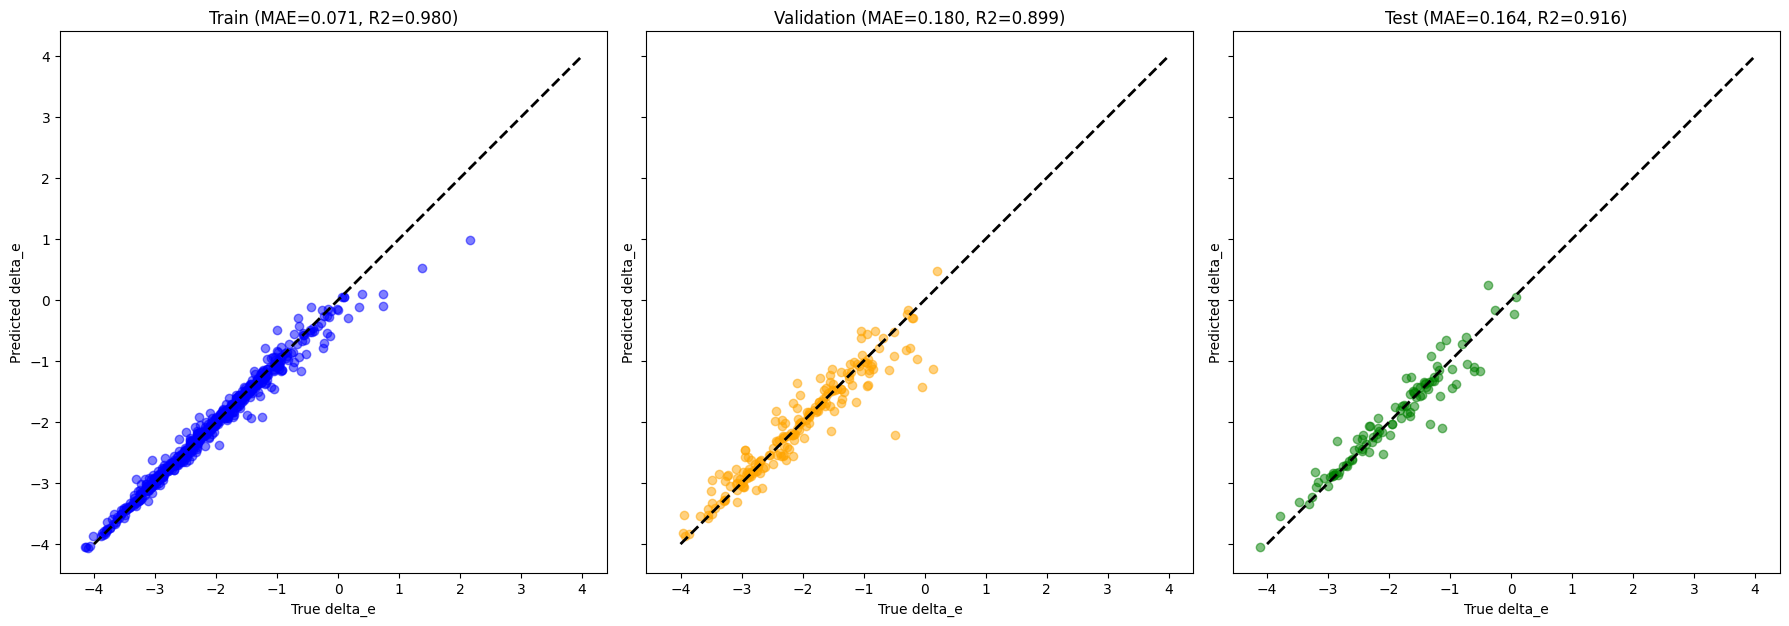

In [ ]:
from sklearn.metrics import r2_score

final_features = selected_features_dict[30]
rf_final = RandomForestRegressor(n_estimators=100, random_state=17, n_jobs=1)
X_train_final = X_train[:, [X.columns.get_loc(f) for f in final_features]]
rf_final.fit(X_train_final, y_train)

# Predict on train, validation, and test sets
X_val_final = X_val[:, [X.columns.get_loc(f) for f in final_features]]
X_test_final = X_test[:, [X.columns.get_loc(f) for f in final_features]]

y_train_pred = rf_final.predict(X_train_final)
y_val_pred = rf_final.predict(X_val_final)
y_test_pred = rf_final.predict(X_test_final)

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
min_val = -4.0
max_val = 4.0

# Train parity plot
axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue')
axes[0].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
axes[0].set_title(f'Train (MAE={mae_train:.3f}, R2={r2_train:.3f})')
axes[0].set_xlabel('True delta_e')
axes[0].set_ylabel('Predicted delta_e')
axes[0].set_aspect('equal', adjustable='box')

# Validation parity plot
axes[1].scatter(y_val, y_val_pred, alpha=0.5, color='orange')
axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
axes[1].set_title(f'Validation (MAE={mae_val:.3f}, R2={r2_val:.3f})')
axes[1].set_xlabel('True delta_e')
axes[1].set_ylabel('Predicted delta_e')
axes[1].set_aspect('equal', adjustable='box')

# Test parity plot
axes[2].scatter(y_test, y_test_pred, alpha=0.5, color='green')
axes[2].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
axes[2].set_title(f'Test (MAE={mae_test:.3f}, R2={r2_test:.3f})')
axes[2].set_xlabel('True delta_e')
axes[2].set_ylabel('Predicted delta_e')
axes[2].set_aspect('equal', adjustable='box')

plt.tight_layout()
fig.savefig("composition_parity.png", dpi=300, bbox_inches='tight')
plt.show()

In [59]:
df_struct_feat = pd.get_dummies(df_comp["spacegroup"], prefix="sg")
df_struct_feat.head()


,sg_Ama2,sg_Amm2,sg_C2,sg_C2/c,sg_C2/m,sg_C2221,sg_Cc,sg_Cm,sg_Cmc21,sg_Cmca,...,sg_Pmn21,sg_Pn-3m,sg_Pna21,sg_Pnma,sg_Pnnm,sg_R-3c,sg_R-3m,sg_R3,sg_R32,sg_R3m
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
y = df_comp["delta_e"]
X_struct = df_struct_feat.copy()

test_fraction = 0.1
validation_fraction = 0.2
X_trainval, X_test, y_trainval, y_test = train_test_split(X_struct, y, 
                                                          test_size=test_fraction, 
                                                          random_state=17)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                  test_size=validation_fraction/(1-test_fraction), 
                                                  random_state=17)
print(f"Training fraction: {X_train.shape[0] / X_scaled.shape[0]:.2f}")
print(f"Validation fraction: {X_val.shape[0] / X_scaled.shape[0]:.2f}")
print(f"Test fraction: {X_test.shape[0] / X_scaled.shape[0]:.2f}")

Training fraction: 0.70
Validation fraction: 0.20
Test fraction: 0.10


In [61]:
from sklearn.metrics import mean_absolute_error

mean_train = y_train.mean()
baseline_mae = mean_absolute_error(y_val, [mean_train] * len(y_val))
print(f"Baseline MAE (predicting mean formation energy): {baseline_mae:.4f} eV")

Baseline MAE (predicting mean formation energy): 0.7620 eV


Training RF models:   0%|          | 0/4 [00:00<?, ?it/s]

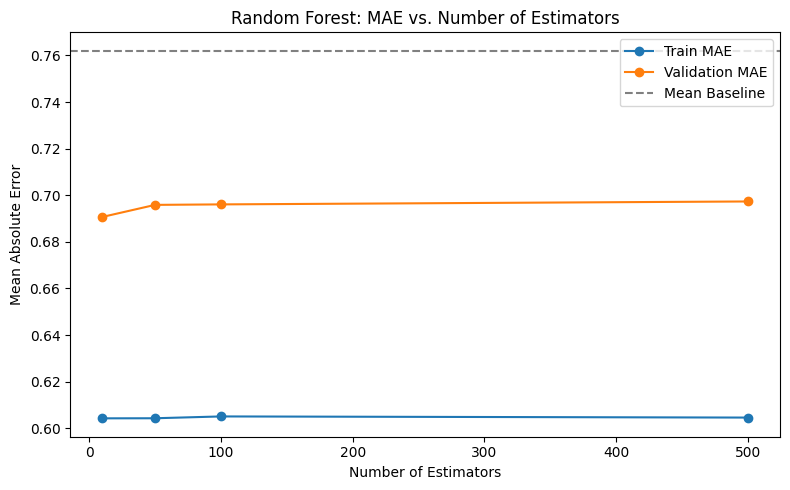

In [62]:
from sklearn.ensemble import RandomForestRegressor
from tqdm.notebook import tqdm

n_estimators_list = [10, 50, 100, 500]
train_maes = []
val_maes = []

for n in tqdm(n_estimators_list, desc='Training RF models'):
    rf = RandomForestRegressor(n_estimators=n, random_state=17, n_jobs=1)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_val_pred = rf.predict(X_val)
    train_maes.append(mean_absolute_error(y_train, y_train_pred))
    val_maes.append(mean_absolute_error(y_val, y_val_pred))

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, train_maes, marker='o', label='Train MAE')
plt.plot(n_estimators_list, val_maes, marker='o', label='Validation MAE')
plt.axhline(baseline_mae, color='gray', linestyle='--', label='Mean Baseline')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest: MAE vs. Number of Estimators')
plt.legend()
plt.tight_layout()
plt.savefig("structure_rf_n_estimators_mae.png", dpi=300, bbox_inches='tight')
plt.show()

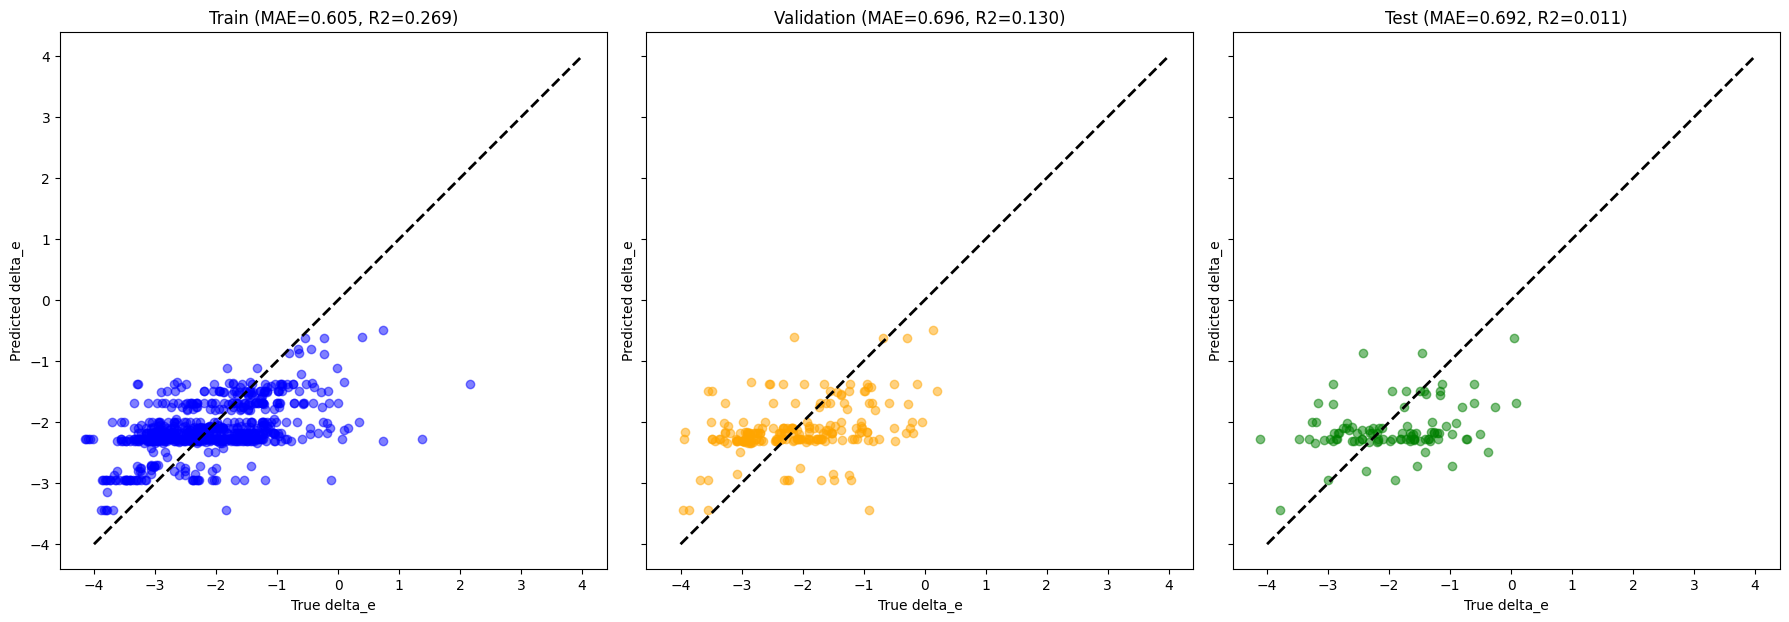

In [ ]:
from sklearn.metrics import r2_score

rf_final = RandomForestRegressor(n_estimators=100, random_state=17, n_jobs=1)
rf_final.fit(X_train, y_train)


y_train_pred = rf_final.predict(X_train)
y_val_pred = rf_final.predict(X_val)
y_test_pred = rf_final.predict(X_test)

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
min_val = -4.0
max_val = 4.0

# Train parity plot
axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue')
axes[0].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
axes[0].set_title(f'Train (MAE={mae_train:.3f}, R2={r2_train:.3f})')
axes[0].set_xlabel('True delta_e')
axes[0].set_ylabel('Predicted delta_e')
axes[0].set_aspect('equal', adjustable='box')

# Validation parity plot
axes[1].scatter(y_val, y_val_pred, alpha=0.5, color='orange')
axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
axes[1].set_title(f'Validation (MAE={mae_val:.3f}, R2={r2_val:.3f})')
axes[1].set_xlabel('True delta_e')
axes[1].set_ylabel('Predicted delta_e')
axes[1].set_aspect('equal', adjustable='box')

# Test parity plot
axes[2].scatter(y_test, y_test_pred, alpha=0.5, color='green')
axes[2].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
axes[2].set_title(f'Test (MAE={mae_test:.3f}, R2={r2_test:.3f})')
axes[2].set_xlabel('True delta_e')
axes[2].set_ylabel('Predicted delta_e')
axes[2].set_aspect('equal', adjustable='box')

plt.tight_layout()
fig.savefig("structure_parity.png", dpi=300, bbox_inches='tight')
plt.show()

In [64]:
import json

summary = {
    "composition_model": {
        "model": "RandomForest",
        "n_estimators": 100,
        "features": 30,
        "train_mae": 0.071,
        "val_mae": 0.180,
        "test_mae": 0.164,
        "train_r2": 0.980,
        "val_r2": 0.899,
        "test_r2": 0.916
    },
    "structure_model": {
        "model": "RandomForest",
        "n_estimators": 100,
        "features": 90,
        "train_mae": 0.605,
        "val_mae": 0.696,
        "test_mae": 0.692,
        "train_r2": 0.269,
        "val_r2": 0.130,
        "test_r2": 0.011
    },
    "baseline_mae": 0.762
}

with open("performance_summary.json", "w") as f:
    json.dump(summary, f, indent=4)

print("Saved performance_summary.json")


Saved performance_summary.json
